In [108]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.head()
summary = summary.rename(columns={"tucaseid": "id", "TUFINLWGT": "weight", "TEAGE": "age", "TESEX": "sex", "TELFS": "working_status", "TRYHHCHILD": "age_y_child", "TRCHILDNUM": "num_children"})
summary.columns[10:20]

Index(['TEMJOT', 'TRDPFTPT', 'TESCHENR', 'TESCHLVL', 'TRSPPRES', 'TESPEMPNOT',
       'TRERNWA', 'num_children', 'TRSPFTPT', 'TEHRUSLT'],
      dtype='object')

In [5]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['weight', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [6]:
# avg. minutes spent writing for personal enjoyment
average_minutes(summary, "120313")

0.24096419699939733

In [7]:
#tools
#to_frame()

In [8]:
#People who reported writing for personal enjoyment
writers = summary[summary.t120313 > 0]

In [22]:
#for people who wrote - average minutes doing so
average_minutes(writers, "120313")
#wow, very high

129.55103142238858

In [10]:
#how many people out of total is this?
a = len(writers)
b = len(summary)
c = len(writers) / len(summary) * 100
print("{} people out of {} reported writing. That's {}%.".format(a, b, c))

25 people out of 11385 reported writing. That's 0.21958717610891526%.


In [11]:
hunting_time = average_minutes(summary, "130118")
hunters = summary[summary.t130118 > 0]
a = len(hunters)
b = len(summary)
c = len(hunters) / len(summary) * 100
print("{} people out of {} reported writing. That's {}%.".format(a, b, c))

29 people out of 11385 reported writing. That's 0.25472112428634164%.


In [12]:
# hunters vs. people writing for personal enjoyment

In [13]:
# average age 
print("Avg. hunter age: {}".format(hunters.age.mean().round(1)))
print("Avg. writer age: {}".format(writers.age.mean().round(1)))

Avg. hunter age: 39.9
Avg. writer age: 54.1


In [14]:
# count gender hunters
print(len(hunters[hunters.sex == 1]))
print(len(hunters[hunters.sex == 2]))

26
3


In [15]:
# count gender writers
print(len(writers[writers.sex == 1]))
print(len(writers[writers.sex == 2]))

11
14


In [34]:
total_average_mins_trad_workout = average_minutes(summary, 130101) + average_minutes(summary, 130104) + average_minutes(summary, 130124) + average_minutes(summary, 130128) + average_minutes(summary, 130131) + average_minutes(summary, 130133) + average_minutes(summary, 130136) + average_minutes(summary, 130134)
aeroobics_avg_mins = average_minutes(summary, 130101)
biking_avg_mins = average_minutes(summary, 130104) 
running_avg_mins = average_minutes(summary, 130124)
cardio_equip_avg_mins = average_minutes(summary, 130128)
walking_avg_mins = average_minutes(summary, 130131)
lifting_avg_mins = average_minutes(summary, 130133)
yoga_avg_mins = average_minutes(summary, 130136)
non_specified_avg_mins = average_minutes(summary, 130134)


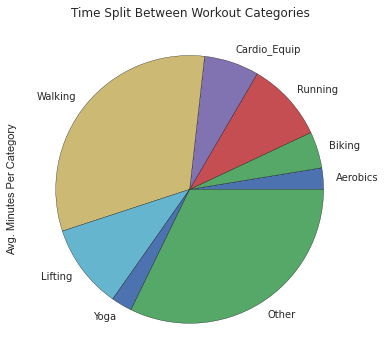

In [109]:
# pie chart of different workout categories
series = pd.Series([aeroobics_avg_mins, biking_avg_mins, running_avg_mins, cardio_equip_avg_mins, walking_avg_mins, lifting_avg_mins, yoga_avg_mins, non_specified_avg_mins], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Walking', 'Lifting', 'Yoga', 'Other'], name='Avg. Minutes Per Category')
series.plot(kind='pie', figsize=(6, 6)).set_title('Time Split Between Workout Categories')


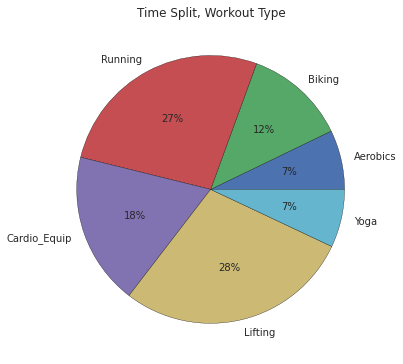

In [110]:
series = pd.Series([aeroobics_avg_mins, biking_avg_mins, running_avg_mins, cardio_equip_avg_mins, lifting_avg_mins, yoga_avg_mins], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Lifting', 'Yoga'], name='')
series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type')


In [63]:
males = summary[summary.sex == 1]
females = summary[summary.sex == 2]

In [65]:
# men and women split in workout type

aeroobics_males = average_minutes(males, 130101)
biking_males = average_minutes(males, 130104) 
running_males = average_minutes(males, 130124)
cardio_equip_males = average_minutes(males, 130128)
walking_males = average_minutes(males, 130131)
lifting_males = average_minutes(males, 130133)
yoga_males = average_minutes(males, 130136)
non_specified_males = average_minutes(males, 130134)

aeroobics_females = average_minutes(females, 130101)
biking_females = average_minutes(females, 130104) 
running_females = average_minutes(females, 130124)
cardio_equip_females = average_minutes(females, 130128)
walking_females = average_minutes(females, 130131)
lifting_females = average_minutes(females, 130133)
yoga_females = average_minutes(females, 130136)
non_specified_females = average_minutes(females, 130134)



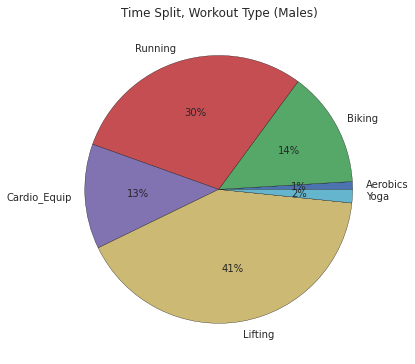

In [111]:
series = pd.Series([aeroobics_males, biking_males, running_males, cardio_equip_males, lifting_males, yoga_males], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Lifting', 'Yoga'], name='')
series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type (Males)')

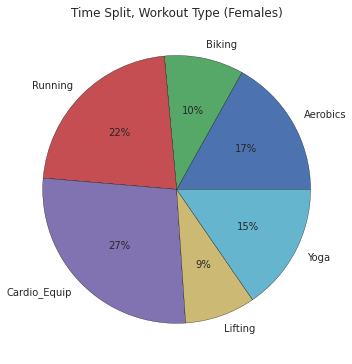

In [112]:
series = pd.Series([aeroobics_females, biking_females, running_females, 
                    cardio_equip_females, lifting_females, 
                    yoga_females], index=['Aerobics', 'Biking', 'Running', 
                                          'Cardio_Equip', 'Lifting', 'Yoga'], name='')

series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type (Females)')

In [73]:
#Time spent working out males vs. females
average_mins_working_out_males = average_minutes(males, 130101) + average_minutes(males, 130104) + average_minutes(males, 130124) + average_minutes(males, 130128) + average_minutes(males, 130131) + average_minutes(males, 130133) + average_minutes(males, 130136) + average_minutes(males, 130134)
average_mins_working_out_females = average_minutes(females, 130101) + average_minutes(females, 130104) + average_minutes(females, 130124) + average_minutes(females, 130128) + average_minutes(females, 130131) + average_minutes(females, 130133) + average_minutes(females, 130136) + average_minutes(females, 130134)

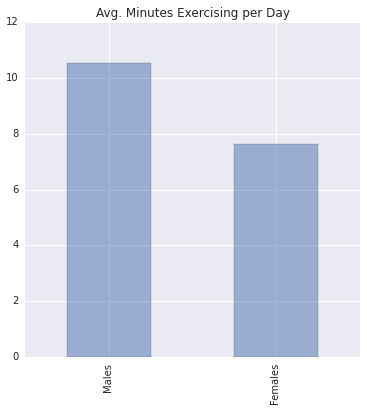

In [113]:
males_females = pd.Series([average_mins_working_out_males, average_mins_working_out_females], index = ['Males', 'Females'])
males_females.plot(kind='bar', figsize=(6, 6), alpha=0.5).set_title('Avg. Minutes Exercising per Day')


Set up a chart describing workout habits by age group!! Men and then Women

Age Demographics

In [ ]:
males_14-17
males_18-23
males_24-30
males_31_40
males_41_50
males_51_60
males_70_andup